#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas import Series, DataFrame
import requests
import io
import pandas as pd

In [ ]:
API = "https://fuyoh-ads.com/api/pricing_decision/sample"
response = requests.get(API)
json = response.json()
print(json)
signage = json['data']['signage']
weather = json['data']['weather']
holiday = json['data']['holiday']
popularTime = json['data']['popular_time']

dfSignage = pd.read_csv(io.StringIO(signage), lineterminator='\n', sep='\t')
dfWeather = pd.read_csv(io.StringIO(weather), lineterminator='\n', sep='\t')
dfHoliday = pd.read_csv(io.StringIO(holiday), lineterminator='\n', sep='\t')
dfPT = pd.read_csv(io.StringIO(popularTime), lineterminator='\n', sep='\t')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
dfPop=pd.read_csv('/content/drive/MyDrive/VRA/dataset_csv/population.csv')
#dfPT=pd.read_csv('/content/drive/MyDrive/VRA/dataset_csv/dfPT.csv')
#dfWeather=pd.read_csv('/content/drive/MyDrive/VRA/dataset_csv/dfWeather.csv')
#dfSchedule=pd.read_csv('/content/drive/MyDrive/VRA/dataset_csv/dfSchedule.csv')
#dfHoliday=pd.read_csv('/content/drive/MyDrive/VRA/dataset_csv/dfHoliday.csv')

#Weather

In [ ]:
Weather = dfWeather.copy()
Weather = Weather.drop("createdAt", axis=1)

In [ ]:
import json
dt =[]
temp = []
feels_like = []
pressure = []
humidity = []
dew_point = []
uvi = []
clouds = []
visibility = []
wind_speed = []
wind_deg = []
wind_gust = []
weather_id = []
weather_main = []
weather_description = []
weather_icon = []
pop = []

for record in Weather.weather:
    weathers = json.loads(record)
    for weather in weathers: 
        dt.append(weather['data']['dt'])
        temp.append(weather['data']['temp'])
        feels_like.append(weather['data']['feels_like'])
        pressure.append(weather['data']['pressure'])
        humidity.append(weather['data']['humidity'])
        dew_point.append(weather['data']['dew_point'])
        uvi.append(weather['data']['uvi'])
        clouds.append(weather['data']['clouds'])
        visibility.append(weather['data']['visibility'])
        wind_speed.append(weather['data']['wind_speed'])
        wind_deg.append(weather['data']['wind_deg'])
        wind_gust.append(weather['data']['wind_gust'])
        weather_id.append(weather['data']['weather'][0]['id'])
        weather_main.append(weather['data']['weather'][0]['main'])
        weather_description.append(weather['data']['weather'][0]['description'])
        weather_icon.append(weather['data']['weather'][0]['icon'])
        pop.append(weather['data']['pop'])
    
Weather = pd.DataFrame()
Weather.insert(0, "dt", dt)
Weather.insert(1, "temp", temp)
Weather.insert(2, "feels_like", feels_like)
Weather.insert(3, "pressure", pressure)
Weather.insert(4, "humidity", humidity)
Weather.insert(5, "dew_point", dew_point)
Weather.insert(6, "uvi", uvi)
Weather.insert(7, "clouds", clouds)
Weather.insert(8, "visibility", visibility)
Weather.insert(9, "wind_speed", wind_speed)
Weather.insert(10, "wind_deg", wind_deg)
Weather.insert(11, "wind_gust", wind_gust)
Weather.insert(12, "weather_id", weather_id)
Weather.insert(13, "weather_main", weather_main)
Weather.insert(14, "weather_description", weather_description)
Weather.insert(15, "weather_icon", weather_icon)
Weather.insert(16, "pop", pop)

In [ ]:
dfWeather

,signage_id,weather,createdAt
0,1000,"[{""data"":{""dt"":1619020800,""temp"":25.56,""feels_...",Thu Apr 22 2021 00:43:37 GMT+0800 (Malaysia Time)
1,1001,"[{""data"":{""dt"":1619020800,""temp"":27.66,""feels_...",Thu Apr 22 2021 00:43:37 GMT+0800 (Malaysia Time)
2,1002,"[{""data"":{""dt"":1619020800,""temp"":25.53,""feels_...",Thu Apr 22 2021 00:43:37 GMT+0800 (Malaysia Time)
3,1003,"[{""data"":{""dt"":1619020800,""temp"":26.26,""feels_...",Thu Apr 22 2021 00:43:37 GMT+0800 (Malaysia Time)
4,1004,"[{""data"":{""dt"":1619020800,""temp"":26.27,""feels_...",Thu Apr 22 2021 00:43:38 GMT+0800 (Malaysia Time)
...,...,...,...
6115,1141,"[{""data"":{""dt"":1623513600,""temp"":24.48,""feels_...",Sun Jun 13 2021 00:00:14 GMT+0800 (Malaysia Time)
6116,1142,"[{""data"":{""dt"":1623513600,""temp"":26.12,""feels_...",Sun Jun 13 2021 00:00:14 GMT+0800 (Malaysia Time)
6117,1143,"[{""data"":{""dt"":1623513600,""temp"":26.18,""feels_...",Sun Jun 13 2021 00:00:14 GMT+0800 (Malaysia Time)
6118,1144,"[{""data"":{""dt"":1623513600,""temp"":26.76,""feels_...",Sun Jun 13 2021 00:00:14 GMT+0800 (Malaysia Time)


In [ ]:
#covert to list
dfWeather['weather'] = dfWeather['weather'].str.split('}},{"')

#convert list of pd.Series and stack it
dfWeather = (dfWeather
 .set_index(['signage_id'])['weather']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_1', axis=1)
 .rename(columns={0:'weather'}))


In [ ]:
Weather['signage_id'] = dfWeather['signage_id']

In [ ]:
data = 80640 #total data that I am using
total_data = Weather.shape[0]
total_new_data = total_data - data
total_new_data

120960

In [ ]:
dfWeather = Weather[total_new_data:]
dfWeather.reset_index(drop=True,inplace = True)
dfWeather

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather_id,weather_main,weather_description,weather_icon,pop,signage_id
0,1621008000,26.84,30.19,1008,89,24.87,0.0,20,10000,1.04,322,1.17,801,Clouds,few clouds,02n,0.68,1000
1,1621011600,26.38,26.38,1008,91,24.79,0.0,32,10000,1.15,339,1.25,802,Clouds,scattered clouds,03n,0.68,1000
2,1621015200,25.89,26.91,1008,91,24.31,0.0,46,10000,1.11,347,1.15,802,Clouds,scattered clouds,03n,0.66,1000
3,1621018800,25.32,26.31,1007,92,23.93,0.0,68,10000,0.93,339,1.00,803,Clouds,broken clouds,04n,0.13,1000
4,1621022400,24.70,25.65,1006,93,23.49,0.0,84,10000,0.99,336,1.02,803,Clouds,broken clouds,04n,0.19,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80635,1622286000,27.90,31.00,1009,74,22.94,0.0,53,10000,2.33,167,3.45,803,Clouds,broken clouds,04d,0.07,1145
80636,1622289600,27.27,29.92,1009,76,22.63,0.0,52,10000,2.35,161,4.36,803,Clouds,broken clouds,04n,0.06,1145
80637,1622293200,27.04,29.55,1010,77,22.69,0.0,63,10000,2.09,141,4.03,803,Clouds,broken clouds,04n,0.01,1145
80638,1622296800,26.85,29.24,1011,78,22.78,0.0,72,10000,2.00,137,3.53,803,Clouds,broken clouds,04n,0.05,1145


WEATHER TEMP

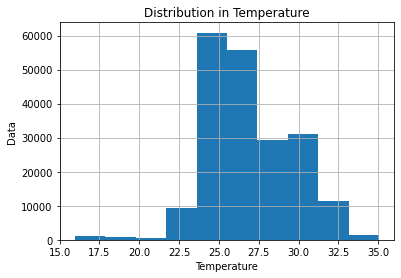

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Temperature')
plt.ylabel('Data')
plt.title("Distribution in Temperature")
Weather['temp'].hist()

In [ ]:
max_temp = dfWeather['temp'].max()
min_temp = dfWeather['temp'].min()

point_10_percent = round((10/100) * (max_temp - min_temp) + min_temp,2)
point_90_percent = round((90/100) * (max_temp - min_temp) + min_temp,2)

print(point_10_percent)
print(point_90_percent)

18.11
33.11


In [ ]:
#midpoint
total_rows = dfWeather.shape[0]

max_point =  dfWeather[dfWeather['temp'] <= point_90_percent].max()['temp']
min_point =  dfWeather[dfWeather['temp'] >= point_10_percent].min()['temp']

print(max_point, min_point)
midpoint = round((max_point + min_point)/2,2)
midpoint

33.11 18.11


25.61

In [ ]:
#create new column
dfWeather['temp_distance'] = ""
dfWeather['temp_label'] = ""

In [ ]:
#distance between temp and midpoint
import math

total_rows = dfWeather.shape[0]

for i in range(0,total_rows):
  point_A =  dfWeather['temp'].iloc[i]
  point = point_A - midpoint 
  dfWeather['temp_distance'].iloc[i] = point

In [ ]:
#labeling data
total_rows = dfWeather.shape[0]
max_limit = 2
min_limit = 0.5

for i in range(0,total_rows) :
  if dfWeather['temp_distance'].iloc[i] < 0:
    index = dfWeather['temp_distance'].iloc[i] * min_limit
    dfWeather['temp_label'].iloc[i] = index   
  elif dfWeather['temp_distance'].iloc[i] > 0:
    index = dfWeather['temp_distance'].iloc[i] * max_limit
    dfWeather['temp_label'].iloc[i] = index 
  elif dfWeather['temp_distance'].iloc[i] == 0:
    dfWeather['temp_label'].iloc[i] = 0

In [ ]:
#covert object to float
dfWeather['temp_label'] = pd.to_numeric(dfWeather['temp_label'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler(feature_range = (0.5,2))

dfWeather[['temp_label']]= scaler.fit_transform(dfWeather[['temp_label']])

In [ ]:
total_rows = dfWeather.shape[0]
max_limit = 2
min_limit = 0.5

for i in range(0,total_rows) :  
  if dfWeather['temp'].iloc[i] > max_point or dfWeather['temp'].iloc[i] < min_point :
    dfWeather['temp_label'].iloc[i] = 0.5

In [ ]:
dfWeather[:20]

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather_id,weather_main,weather_description,weather_icon,pop,signage_id,temp_distance,temp_label
0,1621008000,26.84,30.19,1008,89,24.87,0.00,20,10000,1.04,322,1.17,801,Clouds,few clouds,02n,0.68,1000,1.23,0.957356
1,1621011600,26.38,26.38,1008,91,24.79,0.00,32,10000,1.15,339,1.25,802,Clouds,scattered clouds,03n,0.68,1000,0.77,0.898507
2,1621015200,25.89,26.91,1008,91,24.31,0.00,46,10000,1.11,347,1.15,802,Clouds,scattered clouds,03n,0.66,1000,0.28,0.835821
3,1621018800,25.32,26.31,1007,92,23.93,0.00,68,10000,0.93,339,1.00,803,Clouds,broken clouds,04n,0.13,1000,-0.29,0.790725
4,1621022400,24.70,25.65,1006,93,23.49,0.00,84,10000,0.99,336,1.02,803,Clouds,broken clouds,04n,0.19,1000,-0.91,0.770896
5,1621026000,24.04,24.95,1006,94,22.74,0.00,99,10000,1.14,350,1.24,804,Clouds,overcast clouds,04n,0.43,1000,-1.57,0.749787
6,1621029600,23.91,24.78,1007,93,22.57,0.00,86,10000,0.99,9,0.98,804,Clouds,overcast clouds,04n,0.41,1000,-1.7,0.745629
7,1621033200,23.85,24.72,1007,93,22.44,0.00,74,10000,0.90,26,0.93,803,Clouds,broken clouds,04n,0.42,1000,-1.76,0.743710
8,1621036800,25.12,26.04,1008,90,23.09,0.39,65,10000,0.84,35,0.87,803,Clouds,broken clouds,04d,0.46,1000,-0.49,0.784328
9,1621040400,26.96,29.84,1009,82,23.44,1.77,36,10000,0.57,56,0.66,802,Clouds,scattered clouds,03d,0.39,1000,1.35,0.972708


Feels_like


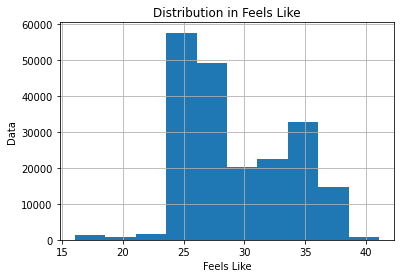

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Feels Like')
plt.ylabel('Data')
plt.title("Distribution in Feels Like")
Weather['feels_like'].hist()

In [ ]:
dfWeather['feels_like_label'] = ""
dfWeather['feels_like_distance'] = ""

In [ ]:
max_feels_like = dfWeather['feels_like'].max()
min_feels_like = dfWeather['feels_like'].min()

point_10_percent = round((10/100) * (max_feels_like - min_feels_like) + min_feels_like,2)
point_90_percent = round((90/100) * (max_feels_like - min_feels_like) + min_feels_like,2)

print(point_10_percent)
print(point_90_percent)

18.6
38.59


In [ ]:
#midpoint
total_rows = dfWeather.shape[0]

max_feels_like =  dfWeather[dfWeather['feels_like'] <= point_10_percent].max()['feels_like']
min_feels_like =  dfWeather[dfWeather['feels_like'] >= point_90_percent].min()['feels_like']

print(max_feels_like, min_feels_like)
midpoint = round((max_feels_like + min_feels_like)/2,2)
midpoint

18.58 38.6


28.59

In [ ]:
#euclidean distance between midpoint and points
import math

total_rows = dfWeather.shape[0]

for i in range(0,total_rows):
  point_A =  dfWeather['feels_like'].iloc[i]
  point = point_A - midpoint 
  dfWeather['feels_like_distance'].iloc[i] = point

In [ ]:
total_rows = dfWeather.shape[0]
max_limit = 2
min_limit = 0.5

for i in range(0,total_rows) :
  if dfWeather['feels_like_distance'].iloc[i] < 0:
    index = dfWeather['feels_like_distance'].iloc[i] * min_limit
    dfWeather['feels_like_label'].iloc[i] = index   
  elif dfWeather['feels_like_distance'].iloc[i] > 0:
    index = dfWeather['feels_like_distance'].iloc[i] * max_limit
    dfWeather['feels_like_label'].iloc[i] = index   
  elif dfWeather['feels_like_distance'].iloc[i] == 0:
    dfWeather['feels_like_label'].iloc[i] = 0 

In [ ]:
dfWeather[:20]

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather_id,weather_main,weather_description,weather_icon,pop,signage_id,temp_distance,temp_label,feels_like_label,feels_like_distance
0,1621008000,26.84,30.19,1008,89,24.87,0.00,20,10000,1.04,322,1.17,801,Clouds,few clouds,02n,0.68,1000,1.23,0.957356,3.2,1.6
1,1621011600,26.38,26.38,1008,91,24.79,0.00,32,10000,1.15,339,1.25,802,Clouds,scattered clouds,03n,0.68,1000,0.77,0.898507,-1.105,-2.21
2,1621015200,25.89,26.91,1008,91,24.31,0.00,46,10000,1.11,347,1.15,802,Clouds,scattered clouds,03n,0.66,1000,0.28,0.835821,-0.84,-1.68
3,1621018800,25.32,26.31,1007,92,23.93,0.00,68,10000,0.93,339,1.00,803,Clouds,broken clouds,04n,0.13,1000,-0.29,0.790725,-1.14,-2.28
4,1621022400,24.70,25.65,1006,93,23.49,0.00,84,10000,0.99,336,1.02,803,Clouds,broken clouds,04n,0.19,1000,-0.91,0.770896,-1.47,-2.94
5,1621026000,24.04,24.95,1006,94,22.74,0.00,99,10000,1.14,350,1.24,804,Clouds,overcast clouds,04n,0.43,1000,-1.57,0.749787,-1.82,-3.64
6,1621029600,23.91,24.78,1007,93,22.57,0.00,86,10000,0.99,9,0.98,804,Clouds,overcast clouds,04n,0.41,1000,-1.7,0.745629,-1.905,-3.81
7,1621033200,23.85,24.72,1007,93,22.44,0.00,74,10000,0.90,26,0.93,803,Clouds,broken clouds,04n,0.42,1000,-1.76,0.743710,-1.935,-3.87
8,1621036800,25.12,26.04,1008,90,23.09,0.39,65,10000,0.84,35,0.87,803,Clouds,broken clouds,04d,0.46,1000,-0.49,0.784328,-1.275,-2.55
9,1621040400,26.96,29.84,1009,82,23.44,1.77,36,10000,0.57,56,0.66,802,Clouds,scattered clouds,03d,0.39,1000,1.35,0.972708,2.5,1.25


In [ ]:
#convert object to float
dfWeather['feels_like_label'] = pd.to_numeric(dfWeather['feels_like_label'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler(feature_range = (0.5,2))

dfWeather[['feels_like_label']]= scaler.fit_transform(dfWeather[['feels_like_label']])

In [ ]:
total_rows = dfWeather.shape[0]
max_limit = 2
min_limit = 0.5

for i in range(0,total_rows) : 
  if dfWeather['feels_like'].iloc[i] > max_feels_like or dfWeather['feels_like'].iloc[i] < min_feels_like :
    dfWeather['feels_like_label'].iloc[i] = 0.5

Pop -> Percipitation

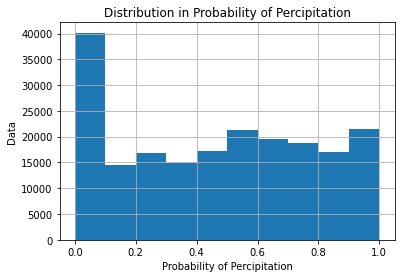

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Probability of Percipitation')
plt.ylabel('Data')
plt.title("Distribution in Probability of Percipitation")
Weather['pop'].hist()

In [ ]:
dfWeather['pop_label'] = ""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
total_rows = dfWeather.shape[0]
max_pop = dfWeather['pop'].max()
min_pop = dfWeather['pop'].min()

# if 0 --> label = 2, 1 --> label = 0 
# range is 0 to 2
for i in range(0,total_rows) :
  if dfWeather['pop'].iloc[i] == max_pop :
    dfWeather['pop_label'].iloc[i] = 0
  elif dfWeather['pop'].iloc[i] == min_pop and dfWeather['pop'].iloc[i] == 0 :
    dfWeather['pop_label'].iloc[i] = 2
  elif dfWeather['pop'].iloc[i] <= 0.1 and dfWeather['pop'].iloc[i] > 0:
    dfWeather['pop_label'].iloc[i] = 1.8
  elif dfWeather['pop'].iloc[i] <= 0.2 and dfWeather['pop'].iloc[i] > 0.1:
    dfWeather['pop_label'].iloc[i] = 1.6
  elif dfWeather['pop'].iloc[i] <= 0.3 and dfWeather['pop'].iloc[i] > 0.2:
    dfWeather['pop_label'].iloc[i] = 1.4
  elif dfWeather['pop'].iloc[i] <= 0.4 and dfWeather['pop'].iloc[i] > 0.3:
    dfWeather['pop_label'].iloc[i] = 1.2
  elif dfWeather['pop'].iloc[i] <= 0.5 and dfWeather['pop'].iloc[i] > 0.4:
    dfWeather['pop_label'].iloc[i] = 1.0
  elif dfWeather['pop'].iloc[i] <= 0.6 and dfWeather['pop'].iloc[i] > 0.5:
    dfWeather['pop_label'].iloc[i] = 0.8
  elif dfWeather['pop'].iloc[i] <= 0.7 and dfWeather['pop'].iloc[i] > 0.6:
    dfWeather['pop_label'].iloc[i] = 0.6
  elif dfWeather['pop'].iloc[i] <= 0.8 and dfWeather['pop'].iloc[i] > 0.7:
    dfWeather['pop_label'].iloc[i] = 0.4
  elif dfWeather['pop'].iloc[i] <= 0.9 and dfWeather['pop'].iloc[i] > 0.8:
    dfWeather['pop_label'].iloc[i] = 0.2
  elif dfWeather['pop'].iloc[i] <= 1.0 and dfWeather['pop'].iloc[i] > 0.9:
    dfWeather['pop_label'].iloc[i] = 0
     

Weather Main

In [ ]:
dfWeather['weather_main_label'] = ""
dfWeather['weather_id_label'] = ""

In [ ]:
y = Weather['weather_main'].value_counts()
y_array = np.array(y)
y_array

Clouds    111297
Rain       87950
Clear       2353
Name: weather_main, dtype: int64

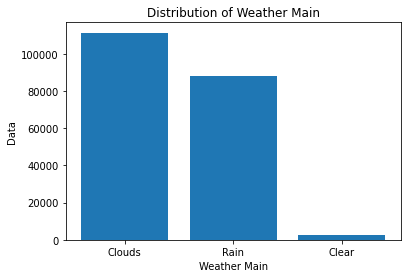

In [ ]:
# Simple Bar Plot
x_label = ["Clouds", "Rain", "Clear"]
plt.bar(x_label,y_array)
plt.xticks(x_label)
plt.xlabel('Weather Main')
plt.ylabel("Data")
plt.title('Distribution of Weather Main')
plt.show()

In [ ]:
i= 0
total_rows = dfWeather.shape[0]
for i in range(0,total_rows) :
  #if Weather['weather_main'] == "Rain" :
  if "Rain" in dfWeather["weather_main"].iloc[i]:
    dfWeather['weather_main_label'].iloc[i] = 1
  elif "Clouds" in dfWeather["weather_main"].iloc[i]:
    dfWeather['weather_main_label'].iloc[i] = 2
  elif "Clear" in dfWeather["weather_main"].iloc[i]:
    dfWeather['weather_main_label'].iloc[i] = 3
  else : 
    dfWeather['weather_main_label'].iloc[i] = 0
  i = i +1

Weather ID

In [ ]:
weather_id = Weather['weather_id'].value_counts()
weather_id

804    71951
500    66428
803    22695
501    20809
802    10373
801     6278
800     2353
502      678
503       35
Name: weather_id, dtype: int64

In [ ]:
y = dict(zip(weather_id.index,weather_id.values))

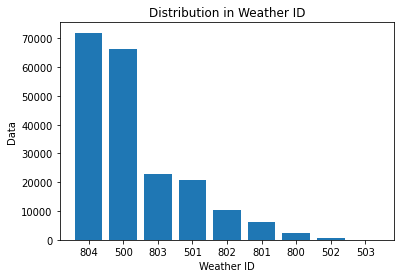

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Weather ID')
plt.ylabel('Data')
plt.title("Distribution in Weather ID")
plt.bar(range(len(y)), y.values(), align='center')
plt.xticks(range(len(y)), list(y.keys()))

plt.show()

In [ ]:
total_rows = dfWeather.shape[0]
for i in range(0,total_rows) :
  #800 is clear sky
  if dfWeather["weather_id"].iloc[i] == 800 :
    dfWeather['weather_id_label'].iloc[i] = 6

  #801-804 is clouds
  elif dfWeather["weather_id"].iloc[i] > 800 and dfWeather["weather_id"].iloc[i] < 805 :
    id = [801,802,803,804]
    j = dfWeather["weather_id"].iloc[i]
    label = 5
    for k in range(0,len(id)) :
      label = 5
      if j == id[k] :
        label = label - (0.25*k)
        dfWeather['weather_id_label'].iloc[i] = label

  #300-321 is drizzle
  elif dfWeather["weather_id"].iloc[i] >= 300 and dfWeather["weather_id"].iloc[i] < 322 :
    id = [300,301,302,310,311,312,313,314,321]
    j = dfWeather["weather_id"].iloc[i]
    label = 4
    for k in range(0,len(id)) :
      label = 4
      if j == id[k] :
        label = label - (0.11*k)
        dfWeather['weather_id_label'].iloc[i] = label

    #500-531 is rain
  elif dfWeather["weather_id"].iloc[i] >= 500 and dfWeather["weather_id"].iloc[i] < 532 :
    id = [500,501,502,503,504,511,520,521,522,531]
    j = dfWeather["weather_id"].iloc[i]
    label = 3
    for k in range(0,len(id)) :
      label = 3
      if j == id[k] :
        label = label - (0.1*k)
        dfWeather['weather_id_label'].iloc[i] = label

  #200-232 is thunderstorm
  elif dfWeather["weather_id"].iloc[i] >= 200 and dfWeather["weather_id"].iloc[i] < 233 :
    id = [200,201,202,210,211,212,221,230,231,232]
    j = dfWeather["weather_id"].iloc[i]
    label = 2
    for k in range(0,len(id)) :
      label = 2
      if j == id[k] :
        label = label - (0.1*k)
        dfWeather['weather_id_label'].iloc[i] = label

  else : 
    dfWeather['weather_id_label'].iloc[i] = 0

In [ ]:
dfWeather.drop(['clouds','pressure','humidity', 'dew_point' ,'uvi', 'visibility','wind_speed', 'wind_deg', 'wind_gust', 'weather_id', 'weather_main', 'weather_description', 'weather_icon'], axis = 1, inplace=True)

#Population

In [ ]:
dfPop['State'].replace(to_replace ="Kuala Lumpur",
                 value ="Wilayah Persekutuan Kuala Lumpur", inplace = True)

In [ ]:
dfPop['State'].replace(to_replace ="Putrajaya",
                 value ="Wilayah Persekutuan Putrajaya", inplace = True)

In [ ]:
dfPop['State'].replace(to_replace ="Labuan",
                 value ="Wilayah Persekutuan Labuan", inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfPop['MedianIncome_label'] = le.fit_transform(dfPop['MedianIncome']) 
dfPop['PopulationDensity_label'] = le.fit_transform(dfPop['PopulationDensity']) 
dfPop

,State,MedianIncome,IncomeClassification,TotalPopulation,PopulationDensity,TotalArea,MedianIncome_label,PopulationDensity_label
0,Wilayah Persekutuan Kuala Lumpur,10549,M4,1771500,7290,243,15,15
1,Wilayah Persekutuan Putrajaya,9983,M4,111700,2280,49,14,14
2,Selangor,8210,M3,6546300,689,9504,13,11
3,Wilayah Persekutuan Labuan,6726,M2,99600,1095,91,12,12
4,Johor,6427,M2,3786200,197,19210,11,7
5,Melaka,6054,M2,933800,561,1664,9,10
6,Pulau Pinang,6169,M2,1774800,1694,1048,10,13
7,Terengganu,5545,M1,1262900,97,13035,8,3
8,Negeri Sembilan,5055,M1,1129500,169,6686,6,6
9,Perlis,4594,B4,255100,311,821,5,9


In [ ]:
dfPop

,State,MedianIncome,IncomeClassification,TotalPopulation,PopulationDensity,TotalArea
0,Kuala Lumpur,10549,M4,1771500,7290,243
1,Putrajaya,9983,M4,111700,2280,49
2,Selangor,8210,M3,6546300,689,9504
3,Labuan,6726,M2,99600,1095,91
4,Johor,6427,M2,3786200,197,19210
5,Melaka,6054,M2,933800,561,1664
6,Pulau Pinang,6169,M2,1774800,1694,1048
7,Terengganu,5545,M1,1262900,97,13035
8,Negeri Sembilan,5055,M1,1129500,169,6686
9,Perlis,4594,B4,255100,311,821


In [ ]:
median_income = dfPop['MedianIncome']
median_income = np.array(median_income)
median_income

array([10549,  9983,  8210,  6726,  6427,  6054,  6169,  5545,  5055,
        4594,  4544,  4235,  4273,  4440,  5522,  3563])

In [ ]:
state = dfPop['State']
state = np.array(state)
state

array(['Kuala Lumpur', 'Putrajaya', 'Selangor', 'Labuan', 'Johor',
       'Melaka', 'Pulau Pinang', 'Terengganu', 'Negeri Sembilan',
       'Perlis', 'Sarawak', 'Sabah', 'Perak', 'Pahang', 'Kedah',
       'Kelantan'], dtype=object)

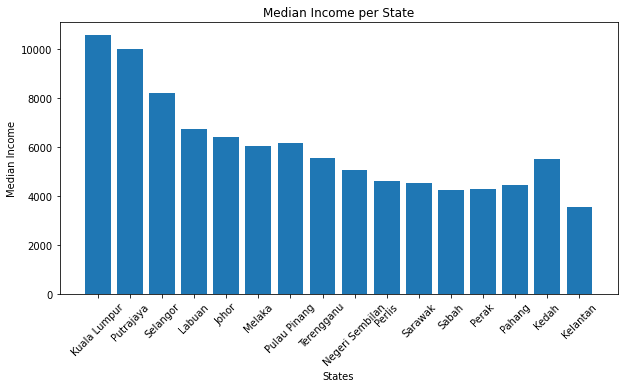

In [ ]:
# Simple Bar Plot
plt.figure(figsize=(10,5))
plt.bar(state,median_income)
plt.xticks(state,rotation = 45 )
plt.xlabel('States')
plt.ylabel("Median Income")
plt.title('Median Income per State')
plt.show()

In [ ]:
pop_density = dfPop['PopulationDensity']
pop_density = np.array(pop_density)
pop_density

array([7290, 2280,  689, 1095,  197,  561, 1694,   97,  169,  311,   23,
         53,  119,   47,  230,  127])

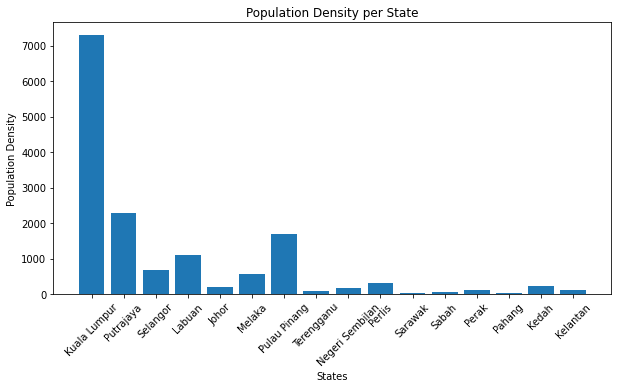

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(state,pop_density)
plt.xticks(state,rotation = 45 )
plt.xlabel('States')
plt.ylabel("Population Density")
plt.title('Population Density per State')
plt.show()

#Rating

In [ ]:
ratingAvgList = []
ratingSum = 0
ratingCount = 0
for record in dfSignage.nearby: 
    nearbys = json.loads(record)
    for nearby in nearbys: 
        if 'rating' not in nearby: 
            continue
        ratingSum += nearby['rating']
        ratingCount += 1
    ratingAvg = ratingSum / ratingCount
    ratingAvgList.append(ratingAvg)

dfSignage.insert(7, "nearbyRatingAvg", ratingAvgList)
dfSignage = dfSignage.drop("name", axis=1)
dfSignage = dfSignage.drop("nearby", axis=1)
dfSignage

,signage_id,group_id,longitude,latitude,address,nearbyRatingAvg
0,1000,6.0,101.91190,2.70179,"Unnamed Road,Biz Avenue Shop,Seremban,Negeri S...",4.015385
1,1001,39.0,100.36980,6.13719,"Lebuhraya Darul Aman,Kampung Lubok Peringgi,Al...",4.162500
2,1002,19.0,101.12299,4.67747,"1,Chemor,Perak",4.140506
3,1003,24.0,101.60007,3.10543,"Jalan SS 6/3,Ss 6,Petaling Jaya,Selangor",4.149425
4,1004,24.0,101.58715,3.09919,"Jalan Eksekutif U1/6,Glenmarie Golf And Countr...",4.149425
...,...,...,...,...,...,...
115,1141,51.0,103.32267,2.03081,"Jalan Cantik,Kampung Masjid Lama,Kluang,Johor",4.152569
116,1142,52.0,102.24240,2.22000,"Lebuh AMJ,Melaka,Melaka",4.152785
117,1143,52.0,102.25244,2.21468,"Lorong Mayang 2,Taman Peringgit Jaya,Melaka,Me...",4.152398
118,1144,NaN,103.66678,1.52865,"Jalan Bendahara 9,Taman Ungku Tun Aminah,Skuda...",4.153986


In [ ]:
stateList = []
for record in dfSignage.address:
    address = record.rsplit(',')
    stateList.append(address[-1])

dfSignage.insert(4, "state", stateList)
dfSignage = dfSignage.drop("address", axis=1)
dfSignage.head()

,signage_id,group_id,longitude,latitude,state,nearbyRatingAvg
0,1000,6.0,101.91190,2.70179,Negeri Sembilan,4.054054
1,1001,39.0,100.36980,6.13719,Kedah,4.148438
2,1002,19.0,101.12299,4.67747,Perak,4.138235
3,1003,24.0,101.60007,3.10543,Selangor,4.075610
4,1004,24.0,101.58715,3.09919,Selangor,4.110067


#dfLabel

In [ ]:
dfLabel = dfWeather

In [ ]:
dfLabel = dfLabel.drop(['temp_distance', 'feels_like_distance'], axis = 1)

In [ ]:
dfLabel['nearby_avg_rating'] = ""
dfLabel['median_income_label'] = ""
dfLabel['population_density_label'] = ""
dfLabel['state'] = ""
dfLabel['nearby_avg_rating'] = pd.to_numeric(dfLabel['nearby_avg_rating'])
dfLabel['median_income_label'] = pd.to_numeric(dfLabel['median_income_label'])
dfLabel['population_density_label'] = pd.to_numeric(dfLabel['population_density_label'])
dfLabel['state'] = pd.to_numeric(dfLabel['state'])

In [ ]:
total_rows = dfSignage.shape[0] #lesser signage id
total_rows_new = dfLabel.shape[0]
for i in range(0,total_rows) :#lesser signage id
  for j in range(0,total_rows_new):
  #check signage_id       
    if dfLabel["signage_id"].iloc[j] == dfSignage["signage_id"].iloc[i]:
    #copy data 
      dfLabel['state'].iloc[j] = dfSignage['state'].iloc[i]
      dfLabel['nearby_avg_rating'].iloc[j] = dfSignage['nearbyRatingAvg'].iloc[i]
    j=j+1
  i=i+1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
total_rows = dfPop.shape[0] #lesser signage id
total_rows_new = dfLabel.shape[0]
for i in range(0,total_rows) :#lesser signage id
  for j in range(0,total_rows_new):
  #check state        
    if dfLabel["state"].iloc[j] == dfPop["State"].iloc[i]:
    #copy data 
      dfLabel['median_income_label'].iloc[j] = dfPop['MedianIncome_label'].iloc[i]
      dfLabel['population_density_label'].iloc[j] = dfPop['PopulationDensity_label'].iloc[i]
    j=j+1
  i=i+1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#Popular Time

In [ ]:
#fill NaN with previous value
dfPT.fillna(method='ffill',inplace = True)

In [ ]:
import json
day = []
hour = []
pop = []
total_hours = 24

for record in dfPT.popular_time:
  pop_time = json.loads(record)
  for popular_time in pop_time:
    for j in range (0,total_hours) :
      day.append(popular_time['name'])
      hour.append(j)
      pop.append(popular_time['data'][j])

dfPop = pd.DataFrame()
dfPop.insert(0, "signage_id", "")
#dfPop.insert(1, "group_id", "")
dfPop.insert(1, "day", day)
dfPop.insert(2, "hour", hour)
dfPop.insert(3, "pop", pop)

In [ ]:
#get signage_id 
total_rows = dfPT.shape[0] #120rows
day = len(np.unique(dfPop.day))
total_slots = 24 * day # 24hours * days
pointer  = 0

for i in range (0, total_rows) :
  for j in range (pointer, total_slots) :
     dfPop['signage_id'].iloc[j]= dfPT['signage_id'].iloc[i]
     #dfPop['group_id'].iloc[j]= dfPT['group_id'].iloc[i]
     pointer = pointer + 1
     total_slots = total_slots + 1

In [ ]:
dfLabel

,date,hour,day,pop_time,pop_time_label,holiday,holiday_label,dt,temp,feels_like,clouds,pop,signage_id,temp_label,feels_like_label,pop_label,weather_main_label,weather_id_label,nearby_avg_rating,median_income_label,median_income,population_density,population_density_label,state
0,2021-05-15,0,Saturday,0,,0,,1621008000,26.84,30.19,20,0.68,1000,0.957356,0.953433,0.6,2,5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
1,2021-05-15,1,Saturday,0,,0,,1621011600,26.38,26.38,32,0.68,1000,0.898507,0.746759,0.6,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
2,2021-05-15,2,Saturday,0,,0,,1621015200,25.89,26.91,46,0.66,1000,0.835821,0.759482,0.6,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
3,2021-05-15,3,Saturday,0,,0,,1621018800,25.32,26.31,68,0.13,1000,0.790725,0.745079,1.6,2,4.5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
4,2021-05-15,4,Saturday,0,,0,,1621022400,24.70,25.65,84,0.19,1000,0.770896,0.729237,1.6,2,4.5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80635,2021-05-29,19,Saturday,35,,0,,1622286000,27.90,31.00,53,0.07,1145,1.092964,1.031205,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80636,2021-05-29,20,Saturday,0,,0,,1622289600,27.27,29.92,52,0.06,1145,1.012367,0.927508,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80637,2021-05-29,21,Saturday,0,,0,,1622293200,27.04,29.55,63,0.01,1145,0.982942,0.891983,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80638,2021-05-29,22,Saturday,0,,0,,1622296800,26.85,29.24,72,0.05,1145,0.958635,0.862218,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor


In [ ]:
x = dfPop.MedianIncome.unique()

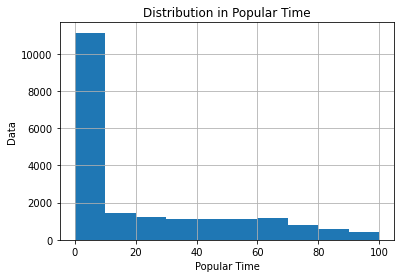

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Popular Time')
plt.ylabel('Data')
plt.title("Distribution in Popular Time")
dfPop['pop'].hist()

In [ ]:
#insert column at first position
dfLabel.insert(loc=0, column='date', value="")
dfLabel.insert(loc=1, column='day', value="")
dfLabel.insert(loc=2, column='pop_time', value="")
dfLabel.insert(loc=3, column='pop_time_label', value="")
dfLabel.insert(loc=4, column='holiday', value="")
dfLabel.insert(loc=5, column='holiday_label', value="")

In [ ]:
#convert dt weather to date and time following our timezone
from datetime import datetime
import pytz
total_rows = dfLabel.shape[0]

for i in range (0, total_rows) :
  dt = dfLabel['dt'].iloc[i]
  tz = pytz.timezone('Asia/Kuala_Lumpur')
  date = datetime.fromtimestamp(dt, tz)
  dates = date.strftime('%Y-%m-%d')
  #tm = date.strftime('%H')
  day = date.strftime("%A")
  dfLabel['date'].iloc[i] = dates
  #dfWeather['hour'].iloc[i] = tm
  dfLabel['day'].iloc[i] = day

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#convert hours to 0-23
total_rows = dfLabel.shape[0]
hour = []

for i in range (0, total_rows, 24) :
  for j in range (0,24):
    hour.append(j)

dfLabel.insert(1, column='hour', value = hour)

In [ ]:
dfLabel

,date,hour,day,pop_time,pop_time_label,holiday,holiday_label,dt,temp,feels_like,clouds,pop,signage_id,temp_label,feels_like_label,pop_label,weather_main_label,weather_id_label,nearby_avg_rating,median_income_label,median_income,population_density,population_density_label,state
0,2021-05-15,0,Saturday,0,,0,,1621008000,26.84,30.19,20,0.68,1000,0.957356,0.953433,0.6,2,5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
1,2021-05-15,1,Saturday,0,,0,,1621011600,26.38,26.38,32,0.68,1000,0.898507,0.746759,0.6,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
2,2021-05-15,2,Saturday,0,,0,,1621015200,25.89,26.91,46,0.66,1000,0.835821,0.759482,0.6,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
3,2021-05-15,3,Saturday,0,,0,,1621018800,25.32,26.31,68,0.13,1000,0.790725,0.745079,1.6,2,4.5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
4,2021-05-15,4,Saturday,0,,0,,1621022400,24.70,25.65,84,0.19,1000,0.770896,0.729237,1.6,2,4.5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80635,2021-05-29,19,Saturday,35,,0,,1622286000,27.90,31.00,53,0.07,1145,1.092964,1.031205,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80636,2021-05-29,20,Saturday,0,,0,,1622289600,27.27,29.92,52,0.06,1145,1.012367,0.927508,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80637,2021-05-29,21,Saturday,0,,0,,1622293200,27.04,29.55,63,0.01,1145,0.982942,0.891983,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80638,2021-05-29,22,Saturday,0,,0,,1622296800,26.85,29.24,72,0.05,1145,0.958635,0.862218,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor


In [ ]:
#insert pop_time data into weather
total_rows = dfLabel.shape[0]
total_pop_rows = dfPop.shape[0]
for i in range (0, total_rows,24) :
  for j in range (0, total_pop_rows,24) :
    if  dfLabel["signage_id"].iloc[i] == dfPop["signage_id"].iloc[j] and dfLabel["day"].iloc[i] == dfPop["day"].iloc[j] and dfLabel["hour"].iloc[i] == dfPop["hour"].iloc[j] :
      #dfWeather["pop_time"].iloc[i] == dfPop["signage_id"][j]
      arr = dfPop['pop'][j:j+24].values
      array = arr.tolist()
      print (array)
      #arr = np.asarray(arr)
      #print (arr)
      k = 0
      for l in range (i, i+24) :
        dfLabel['pop_time'].iloc[l] = array[k]
        k = k+1


In [ ]:
dfLabel

,date,hour,day,pop_time,pop_time_label,holiday,holiday_label,dt,temp,feels_like,clouds,pop,signage_id,temp_label,feels_like_label,pop_label,weather_main_label,weather_id_label,nearby_avg_rating,median_income_label,median_income,population_density,population_density_label,state
0,2021-05-15,0,Saturday,0,,0,,1621008000,26.84,30.19,20,0.68,1000,0.957356,0.953433,0.6,2,5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
1,2021-05-15,1,Saturday,0,,0,,1621011600,26.38,26.38,32,0.68,1000,0.898507,0.746759,0.6,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
2,2021-05-15,2,Saturday,0,,0,,1621015200,25.89,26.91,46,0.66,1000,0.835821,0.759482,0.6,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
3,2021-05-15,3,Saturday,0,,0,,1621018800,25.32,26.31,68,0.13,1000,0.790725,0.745079,1.6,2,4.5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
4,2021-05-15,4,Saturday,0,,0,,1621022400,24.70,25.65,84,0.19,1000,0.770896,0.729237,1.6,2,4.5,4.046154,6.0,5055,169,6.0,Negeri Sembilan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80635,2021-05-29,19,Saturday,35,,0,,1622286000,27.90,31.00,53,0.07,1145,1.092964,1.031205,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80636,2021-05-29,20,Saturday,0,,0,,1622289600,27.27,29.92,52,0.06,1145,1.012367,0.927508,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80637,2021-05-29,21,Saturday,0,,0,,1622293200,27.04,29.55,63,0.01,1145,0.982942,0.891983,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor
80638,2021-05-29,22,Saturday,0,,0,,1622296800,26.85,29.24,72,0.05,1145,0.958635,0.862218,1.8,2,4.5,4.584848,11.0,6427,197,7.0,Johor


#Holiday

In [ ]:
import json
holidayJSON = json.loads(dfHoliday['holidays'][0])
print(holidayJSON['publicHolidays'][2])
stateNameList = []
yearList = []
fullDateList = []

for state in dfHoliday.state_name:
    stateNameList.append(state)

for year in dfHoliday.year:
    yearList.append(year)

for record in dfHoliday.holidays: 
    holidays = json.loads(record)
    dateList = []
    for holiday in holidays['publicHolidays']:
        dateList.append(holiday['date'])
    fullDateList.append(dateList)

dfPH = pd.DataFrame()
dfPH.insert(0, "stateName", stateNameList)
dfPH.insert(1, "year", yearList)
dfPH.insert(2, "dateList", fullDateList)
# dfPH = dfHoliday.drop("holidays", axis=1)
dfPH


{'day': 'Sat', 'date': '8 Feb', 'holiday': 'Thaipusam'}


,stateName,year,dateList
0,johor,2020,"[25 Jan, 26 Jan, 8 Feb, 23 Mar, 24 Apr, 26 Apr..."
1,melaka,2020,"[1 Jan, 25 Jan, 26 Jan, 27 Jan, 15 Apr, 24 Apr..."
2,negeri-sembilan,2020,"[1 Jan, 14 Jan, 25 Jan, 26 Jan, 27 Jan, 8 Feb,..."
3,pahang,2020,"[1 Jan, 25 Jan, 26 Jan, 27 Jan, 1 May, 7 May, ..."
4,kuala-lumpur,2020,"[1 Jan, 25 Jan, 26 Jan, 27 Jan, 1 Feb, 8 Feb, ..."
5,kedah,2020,"[25 Jan, 26 Jan, 22 Mar, 24 Apr, 26 Apr, 1 May..."
6,perlis,2020,"[25 Jan, 26 Jan, 27 Jan, 22 Mar, 23 Mar, 1 May..."
7,selangor,2020,"[1 Jan, 25 Jan, 26 Jan, 27 Jan, 8 Feb, 1 May, ..."
8,labuan,2020,"[1 Jan, 25 Jan, 26 Jan, 27 Jan, 1 Feb, 1 May, ..."
9,sabah,2020,"[1 Jan, 25 Jan, 26 Jan, 27 Jan, 10 Apr, 1 May,..."


In [ ]:
dfPH['stateName'].replace(to_replace ="negeri-sembilan",
                 value ="negeri sembilan", inplace = True)

In [ ]:
dfPH['stateName'].replace(to_replace ="penang",
                 value ="pulau pinang", inplace = True)

In [ ]:
dfPH['stateName'].replace(to_replace ="kuala-lumpur",
                 value ="wilayah persekutuan kuala lumpur", inplace = True)

In [ ]:
dfPH['stateName'].replace(to_replace ="labuan",
                 value ="wilayah persekutuan labuan", inplace = True)

In [ ]:
dfPH['stateName'].replace(to_replace ="putrajaya",
                 value ="wilayah persekutuan putrajaya", inplace = True)

In [ ]:
#adding holiday data
import datetime
total_weather_rows = dfLabel.shape[0]
total_hol_row = dfPH.shape[0]

for i in range(0, total_weather_rows) :
  date_input = dfLabel['date'][i]
  state = dfLabel['state'][i].lower()
  date = datetime.datetime.strptime(date_input,'%Y-%m-%d')
  month_name = date.strftime("%b")
  day = date.strftime("%d")
  day_month = day + " " +  month_name
  for j in range(0, total_hol_row) :
    if dfPH['stateName'][j].lower() == state and dfPH['year'].iloc[j] == date.year :
      if day_month in dfPH['dateList'].loc[j] :
        dfLabel['holiday'].iloc[i] = 1 
      else :
        dfLabel['holiday'].iloc[i] = 0 


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
x = dfLabel.holiday.unique()

In [ ]:
y = dfLabel['holiday'].value_counts()
y_array = np.array(y)
y_array

array([71088,  9552])

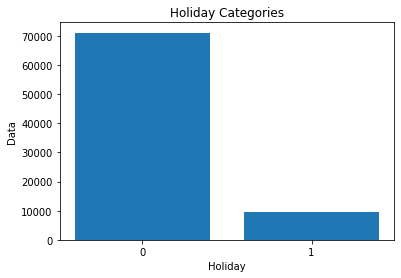

In [ ]:
# Simple Bar Plot
x_label = [0,1]
plt.bar(x_label,y_array)
plt.xticks(x_label)
plt.xlabel('Holiday')
plt.ylabel("Data")
plt.title('Holiday Categories')
plt.show()

In [ ]:
 x = dfLabel

In [ ]:
#testing data

import datetime
date_input = '2020-01-25'
state = "johor"
date = datetime.datetime.strptime(date_input,'%Y-%m-%d')
month_name = date.strftime("%b")
day = date.strftime("%d")
total_row = dfHoliday.shape[0]
day_month = day + " " +  month_name

for i in range (0, total_row):
  if dfPH['stateName'].iloc[i] == state and dfPH['year'].iloc[i] == date.year :
    if day_month in dfPH['dateList'].loc[i] :
      print("True")

True


#Min-max Scaler

In [ ]:
dfLabel.head()

,date,hour,day,pop_time,pop_time_label,holiday,holiday_label,dt,temp,feels_like,clouds,pop,signage_id,temp_label,feels_like_label,pop_label,weather_main_label,weather_id_label,nearby_avg_rating,median_income_label,median_income,population_density,population_density_label,state
0,2021-05-13,0,Thursday,0,,1,,1620835200,26.34,26.34,100,0.57,1000,0.867815,0.741852,0.8,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
1,2021-05-13,1,Thursday,0,,1,,1620838800,26.03,26.03,100,0.66,1000,0.856537,0.734530,0.6,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
2,2021-05-13,2,Thursday,0,,1,,1620842400,25.68,26.65,100,0.70,1000,0.843803,0.749173,0.6,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
3,2021-05-13,3,Thursday,0,,1,,1620846000,25.25,26.21,100,0.35,1000,0.828159,0.738781,1.2,2,4.75,4.046154,6.0,5055,169,6.0,Negeri Sembilan
4,2021-05-13,4,Thursday,0,,1,,1620849600,24.66,25.58,100,0.43,1000,0.806694,0.723902,1,1,5,4.046154,6.0,5055,169,6.0,Negeri Sembilan


In [ ]:
#convert object to float
dfLabel['pop_time_label'] = pd.to_numeric(dfLabel['pop_time'])
dfLabel['holiday_label'] = pd.to_numeric(dfLabel['holiday'])
dfLabel['pop_label'] = pd.to_numeric(dfLabel['pop_label'])
dfLabel['weather_main_label'] = pd.to_numeric(dfLabel['weather_main_label'])
dfLabel['weather_id_label'] = pd.to_numeric(dfLabel['weather_id_label'])
dfLabel['nearby_avg_rating'] = pd.to_numeric(dfLabel['nearby_avg_rating'])
dfLabel['median_income_label'] = pd.to_numeric(dfLabel['median_income_label'])
dfLabel['population_density_label'] = pd.to_numeric(dfLabel['population_density_label'])

In [ ]:
dfLabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      80640 non-null  object 
 1   hour                      80640 non-null  int64  
 2   day                       80640 non-null  object 
 3   pop_time                  80640 non-null  object 
 4   pop_time_label            80640 non-null  int64  
 5   holiday                   80640 non-null  object 
 6   holiday_label             80640 non-null  int64  
 7   dt                        80640 non-null  int64  
 8   temp                      80640 non-null  float64
 9   feels_like                80640 non-null  float64
 10  clouds                    80640 non-null  int64  
 11  pop                       80640 non-null  float64
 12  signage_id                80640 non-null  int64  
 13  temp_label                80640 non-null  float64
 14  feels_

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler(feature_range = (0.5,2))
# transform data
dfLabel[['pop_time_label','holiday_label','pop_label', 'weather_main_label', 'weather_id_label', 'nearby_avg_rating', 'median_income_label', 'population_density_label']] = scaler.fit_transform(dfLabel[['pop_time_label','holiday_label','pop_label', 'weather_main_label', 'weather_id_label', 'nearby_avg_rating', 'median_income_label', 'population_density_label']])


In [ ]:
dfLabel.head()

,date,hour,day,pop_time,pop_time_label,holiday,holiday_label,dt,temp,feels_like,clouds,pop,signage_id,temp_label,feels_like_label,pop_label,weather_main_label,weather_id_label,nearby_avg_rating,median_income_label,median_income,population_density,population_density_label,state
0,2021-05-13,0,Thursday,0,0.5,1,2.0,1620835200,26.34,26.34,100,0.57,1000,0.867815,0.741852,1.10,1.25,0.5,1.28012,1.1,5055,169,1.035714,Negeri Sembilan
1,2021-05-13,1,Thursday,0,0.5,1,2.0,1620838800,26.03,26.03,100,0.66,1000,0.856537,0.734530,0.95,1.25,0.5,1.28012,1.1,5055,169,1.035714,Negeri Sembilan
2,2021-05-13,2,Thursday,0,0.5,1,2.0,1620842400,25.68,26.65,100,0.70,1000,0.843803,0.749173,0.95,1.25,0.5,1.28012,1.1,5055,169,1.035714,Negeri Sembilan
3,2021-05-13,3,Thursday,0,0.5,1,2.0,1620846000,25.25,26.21,100,0.35,1000,0.828159,0.738781,1.40,1.25,0.5,1.28012,1.1,5055,169,1.035714,Negeri Sembilan
4,2021-05-13,4,Thursday,0,0.5,1,2.0,1620849600,24.66,25.58,100,0.43,1000,0.806694,0.723902,1.25,0.50,0.8,1.28012,1.1,5055,169,1.035714,Negeri Sembilan


#Index

In [ ]:
dfLabel['index'] = ""

In [ ]:
total_rows = dfLabel.shape[0]
for i in range(0,total_rows):
  sum =dfLabel['pop_time_label'].iloc[i] + dfLabel['holiday_label'].iloc[i] + dfLabel['temp_label'].iloc[i] + dfLabel['feels_like_label'].iloc[i]+ dfLabel['pop_label'].iloc[i]+ dfLabel['weather_main_label'].iloc[i]+ dfLabel['weather_id_label'].iloc[i]+ dfLabel['nearby_avg_rating'].iloc[i]+ dfLabel['median_income_label'].iloc[i]+ dfLabel['population_density_label'].iloc[i]
  index = sum/10
  dfLabel['index'].iloc[i] = index

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dfLabel['holiday'].isnull().values.any()

False

In [ ]:
#check which column has NaN
dfLabel.columns[dfLabel.isna().any()].tolist()

[]

#Random Forest

GRID SEARCH CV

In [ ]:
import numpy as np 

#assign variable label
labels = np.array(dfLabel['index'])

#remove labels from the features
X = dfLabel
X = X.drop(['date','hour','day','state', 'pop_time', 'holiday', 'dt','signage_id','temp','index','feels_like','pop'], axis=1)

#save feature names
feature_list = list(dfLabel.columns)

#convert to numpy array
Set = np.array(X)

In [ ]:
X

,pop_time_label,holiday_label,temp_label,feels_like_label,pop_label,weather_main_label,weather_id_label,nearby_avg_rating,median_income_label,population_density_label
0,0.500,0.5,0.957356,0.953433,0.95,1.25,1.545455,1.280120,1.1,1.035714
1,0.500,0.5,0.898507,0.746759,0.95,1.25,1.431818,1.280120,1.1,1.035714
2,0.500,0.5,0.835821,0.759482,0.95,1.25,1.431818,1.280120,1.1,1.035714
3,0.500,0.5,0.790725,0.745079,1.70,1.25,1.318182,1.280120,1.1,1.035714
4,0.500,0.5,0.770896,0.729237,1.70,1.25,1.318182,1.280120,1.1,1.035714
...,...,...,...,...,...,...,...,...,...,...
80635,1.025,0.5,1.092964,1.031205,1.85,1.25,1.318182,1.945958,1.6,1.142857
80636,0.500,0.5,1.012367,0.927508,1.85,1.25,1.318182,1.945958,1.6,1.142857
80637,0.500,0.5,0.982942,0.891983,1.85,1.25,1.318182,1.945958,1.6,1.142857
80638,0.500,0.5,0.958635,0.862218,1.85,1.25,1.318182,1.945958,1.6,1.142857


In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test , y_train, y_test = train_test_split(Set, labels , test_size = 0.10, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42, bootstrap = True, oob_score = True)

In [ ]:
param_grid = {
    'n_estimators' : [90,300,500,1000],
    'max_features' : ['auto','sqrt', 'log2'],
    'min_samples_leaf' : [1,2,4],
    'min_samples_split' : [2,3,5],
    'n_jobs' :[-1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV #

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 2)
CV_rf.fit(X_train, y_train)

In [ ]:
CV_rf.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'n_jobs': -1}

In [ ]:
CV_rf.best_score_

0.99387792322966

n_estimator = 1000

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', min_samples_leaf=1, min_samples_split = 2,random_state = 42, oob_score = True)

rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#50,50
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006364443871000535
R2 :  0.996301871563324
MSE :  0.00010090187279199544
RMSE :  0.010044992423690296
OOB :  0.9961444217147146


In [ ]:
#60,40 #57s
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.005962888149933637
R2 :  0.9966637983745344
MSE :  9.126292813328649e-05
RMSE :  0.009553163252728725
OOB :  0.9966517406688333


In [ ]:
#70,30 #1m 40s
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.005632296420095111
R2 :  0.9970455836953386
MSE :  8.070537300821597e-05
RMSE :  0.008983616922387996
OOB :  0.9969866560499009


In [ ]:
#80,20
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.005314663056390062
R2 :  0.9973653644590994
MSE :  7.268690180312057e-05
RMSE :  0.008525661370422858
OOB :  0.9972654465171725


FEATURE IMPORTANCE

In [ ]:
#50,50
def rf_feat_importance(rf, df):
    return pd.DataFrame({'cols':df.columns, 'imp':rf.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = rf_feat_importance(rf, X)
feat_imp

,cols,imp
6,weather_id_label,0.172869
9,population_density_label,0.164323
5,weather_main_label,0.157406
8,median_income_label,0.147310
4,pop_label,0.083694
0,pop_time_label,0.078756
2,temp_label,0.065595
1,holiday_label,0.064934
7,nearby_avg_rating,0.041419
3,feels_like_label,0.023692


In [ ]:
#60,40
def rf_feat_importance(rf, df):
    return pd.DataFrame({'cols':df.columns, 'imp':rf.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = rf_feat_importance(rf, X)
feat_imp

,cols,imp
6,weather_id_label,0.172869
9,population_density_label,0.164323
5,weather_main_label,0.157406
8,median_income_label,0.147310
4,pop_label,0.083694
0,pop_time_label,0.078756
2,temp_label,0.065595
1,holiday_label,0.064934
7,nearby_avg_rating,0.041419
3,feels_like_label,0.023692


In [ ]:
#70,30
def rf_feat_importance(rf, df):
    return pd.DataFrame({'cols':df.columns, 'imp':rf.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = rf_feat_importance(rf, X)
feat_imp

,cols,imp
6,weather_id_label,0.173004
9,population_density_label,0.167534
5,weather_main_label,0.158200
8,median_income_label,0.142726
4,pop_label,0.082230
0,pop_time_label,0.078148
2,temp_label,0.066667
1,holiday_label,0.065627
7,nearby_avg_rating,0.041660
3,feels_like_label,0.024204


In [ ]:
#80,20
def rf_feat_importance(rf, df):
    return pd.DataFrame({'cols':df.columns, 'imp':rf.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = rf_feat_importance(rf, X)
feat_imp

,cols,imp
6,weather_id_label,0.172355
9,population_density_label,0.170316
5,weather_main_label,0.157680
8,median_income_label,0.139162
4,pop_label,0.083481
0,pop_time_label,0.078922
2,temp_label,0.066781
1,holiday_label,0.066264
7,nearby_avg_rating,0.041099
3,feels_like_label,0.023939


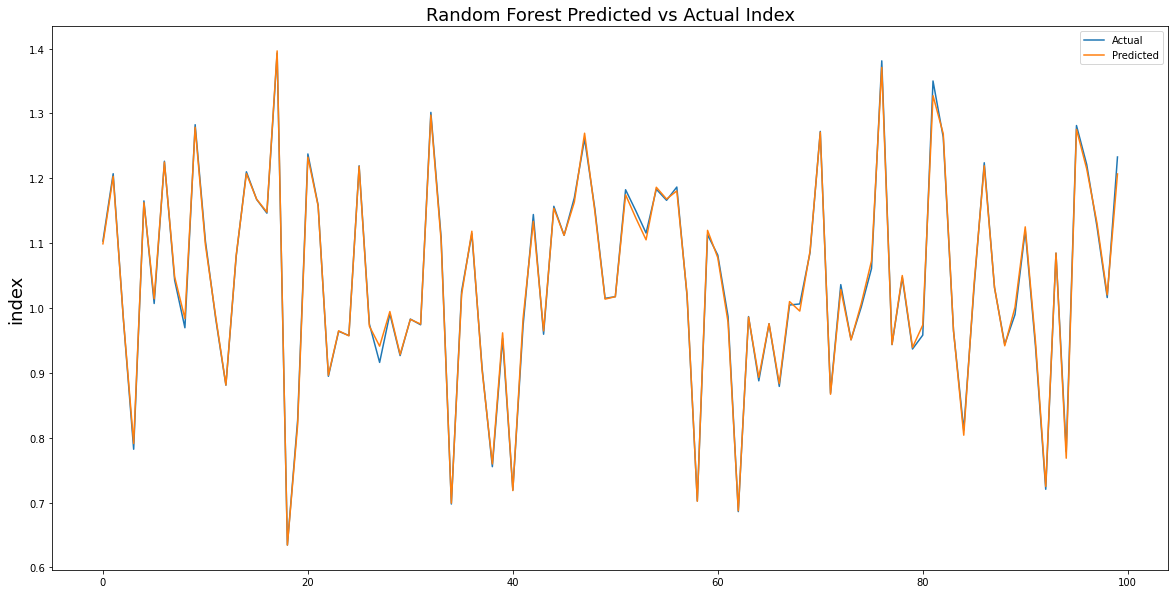

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize = (20,10))
pyplot.plot(y_test[:100], label='Actual')
pyplot.plot(predictions[:100], label='Predicted')
pyplot.ylabel('index', fontsize= 18)
pyplot.title('Random Forest Predicted vs Actual Index', fontsize= 18)
pyplot.legend()
pyplot.show()

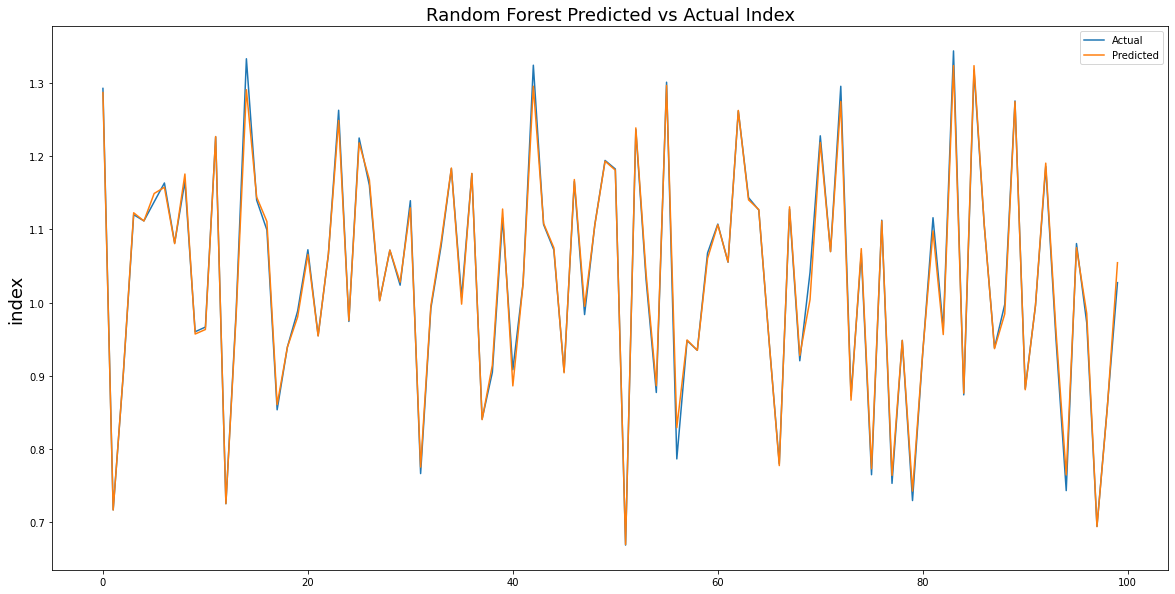

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize = (20,10))
pyplot.plot(y_test[16028:], label='Actual')
pyplot.plot(predictions[16028:], label='Predicted')
pyplot.ylabel('index', fontsize= 18)
pyplot.title('Random Forest Predicted vs Actual Index', fontsize= 18)
pyplot.legend()
pyplot.show()

https://link.springer.com/article/10.1007/s00180-020-00999-9

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

MSE = []
MAE = []
R2 = []


def display_MSE(scores):
    print("MSE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_MAE(scores):
    print("MAE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_R2(scores):
    print("R2: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))


for train_index, test_index in kfold.split(X):   
    X_train, x_test = Set[train_index], Set[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    rf_model = RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', min_samples_leaf=1, min_samples_split = 2,random_state = 42, oob_score = True)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(x_test)
    
    MSE.append(mean_squared_error(y_test, y_pred))
    R2.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))

display_MSE(np.sqrt(MSE))
display_R2(R2)
display_MAE(MAE)


MSE: [0.02350135 0.02328106 0.02331764 0.02340839 0.02315034]
Mean: 0.023332
Std: 0.000119
R2: [0.9799806541918443, 0.9800151076567154, 0.9798047030426754, 0.9796410690067274, 0.9802379981024991]
Mean: 0.979936
Std: 0.000202
MAE: [0.017675035042885836, 0.017656897951249036, 0.017755985390285126, 0.017709222153702655, 0.017526504621216948]
Mean: 0.017665
Std: 0.000077


In [ ]:
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(rf,Set, labels, cv=5 )

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [ ]:
from sklearn.model_selection import KFold #5m 20s

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

MSE = []
R2 = []
MAE = []

def display_MSE(scores):
    print("MSE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_R2(scores):
    print("R2: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_MAE(scores):
    print("MAE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

for train_index, test_index in kfold.split(X):   
    X_train, x_test = Set[train_index], Set[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    rf_model = RandomForestRegressor(n_estimators = 600, max_features = 'auto', max_depth = 10, random_state = 42, oob_score = True)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(x_test)
    
    MSE.append(mean_squared_error(y_test, y_pred))
    R2.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))

    
display_MSE(np.sqrt(MSE))
display_R2(R2)
display_MAE(MAE)



MSE: [0.02382535 0.02334894 0.02347673 0.02363857 0.02356177 0.02356004
 0.02364054 0.02338537 0.02303821 0.02393996]
Mean: 0.023542
Std: 0.000240
R2: [0.979476163570657, 0.9801804981998641, 0.9794127046303543, 0.9796584976044206, 0.9794339404322103, 0.9793191832547814, 0.9793257579624068, 0.9795861806973122, 0.9805575259163803, 0.9787240892777608]
Mean: 0.979567
Std: 0.000474
MAE: [0.01779241128626559, 0.01766508359193716, 0.01781042684089108, 0.017918893420903446, 0.017933254349403904, 0.017912686484513517, 0.017790200071338448, 0.017792381457505294, 0.017534989389458265, 0.01805481758757202]
Mean: 0.017821
Std: 0.000139


In [ ]:
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(rf,Set, labels, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.02


n_estimator = 500

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', min_samples_leaf=1, min_samples_split = 2,random_state = 42, oob_score = True)

rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#50,50
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.007216050029463429
R2 :  0.9955833276345954
MSE :  0.0001205070404689693
RMSE :  0.010977569879940155
OOB :  0.9953887374937341


In [ ]:
#60,40 #57s
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006732486935464015
R2 :  0.9960834832718508
MSE :  0.0001071376447890833
RMSE :  0.010350731606465473
OOB :  0.9959881002516123


In [ ]:
#70,30 #1m 40s
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006415396178920303
R2 :  0.9964488225078235
MSE :  9.700701410031274e-05
RMSE :  0.009849213882351868
OOB :  0.9963276005437663


In [ ]:
#80,20
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006088269850407016
R2 :  0.9968055024271667
MSE :  8.813292304842834e-05
RMSE :  0.009387913668564936
OOB :  0.996637085915459


In [ ]:
#90,10
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.005856488391000431
R2 :  0.9969734592613534
MSE :  8.370791808733679e-05
RMSE :  0.009149203139472683
OOB :  0.9969228000401495


n_estimator = 300

In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test , y_train, y_test = train_test_split(Set, labels , test_size = 0.10, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', min_samples_leaf=1, min_samples_split = 2,random_state = 42, oob_score = True)

rf.fit(X_train, y_train) 

In [ ]:
#50,50
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.0072802365834707585
R2 :  0.9955250711365247
MSE :  0.00012209654441895358
RMSE :  0.011049730513408622
OOB :  0.9952690051464981


In [ ]:
#60,40
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006794250054371528
R2 :  0.996018064794351
MSE :  0.00010892718945122073
RMSE :  0.010436818933526668
OOB :  0.9958666745058227


In [ ]:
#70,30
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006461208467094006
R2 :  0.9964116812684742
MSE :  9.802159609098749e-05
RMSE :  0.009900585643838828
OOB :  0.9962472418766946


In [ ]:
#80,20
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006136886848528528
R2 :  0.9967694358795898
MSE :  8.912796223369778e-05
RMSE :  0.00944076068088254
OOB :  0.9965361286097533


In [ ]:
#90,10
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.005888516698521981
R2 :  0.9969431416276312
MSE :  8.45464417416883e-05
RMSE :  0.00919491390615966
OOB :  0.9968267720943307


n_estimator = 90

In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test , y_train, y_test = train_test_split(Set, labels , test_size = 0.10, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 90, max_features = 'sqrt', min_samples_leaf=1, min_samples_split = 2,random_state = 42, oob_score = True)

rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#50,50
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.007530397147414094
R2 :  0.9952556039205755
MSE :  0.00012944884361864038
RMSE :  0.011377558772365907
OOB :  0.9946090599380573


In [ ]:
#60,40
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.00700894147913637
R2 :  0.995793699580608
MSE :  0.00011506477604704514
RMSE :  0.010726825068352944
OOB :  0.995247778556273


In [ ]:
#70,30
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006674602236540398
R2 :  0.9962139628137989
MSE :  0.00010342264319799268
RMSE :  0.01016969238462957
OOB :  0.9956449511951461


In [ ]:
#80,20
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.006367905157379308
R2 :  0.9965595633109817
MSE :  9.491813189806395e-05
RMSE :  0.00974259369460022
OOB :  0.9960244988874691


In [ ]:
#90,10
predictions = rf.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

#OOB SCORE --> no.of correctly predicted rows from out-of bags samples
print("OOB : ", rf.oob_score_)

MAE :  0.00611804575420189
R2 :  0.9967363154466322
MSE :  9.026683030157543e-05
RMSE :  0.009500885764052499
OOB :  0.9963570667940694


In [ ]:
#90,10 --> 90trees
def rf_feat_importance(rf, df):
    return pd.DataFrame({'cols':df.columns, 'imp':rf.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = rf_feat_importance(rf, X)
feat_imp

,cols,imp
7,weather_id_label,0.194986
10,population_density_label,0.165426
9,median_income_label,0.140640
6,weather_main_label,0.140216
1,pop_time_label,0.074900
5,pop_label,0.074070
3,temp_label,0.065055
2,holiday_label,0.061513
8,nearby_avg_rating,0.042280
4,feels_like_label,0.025302


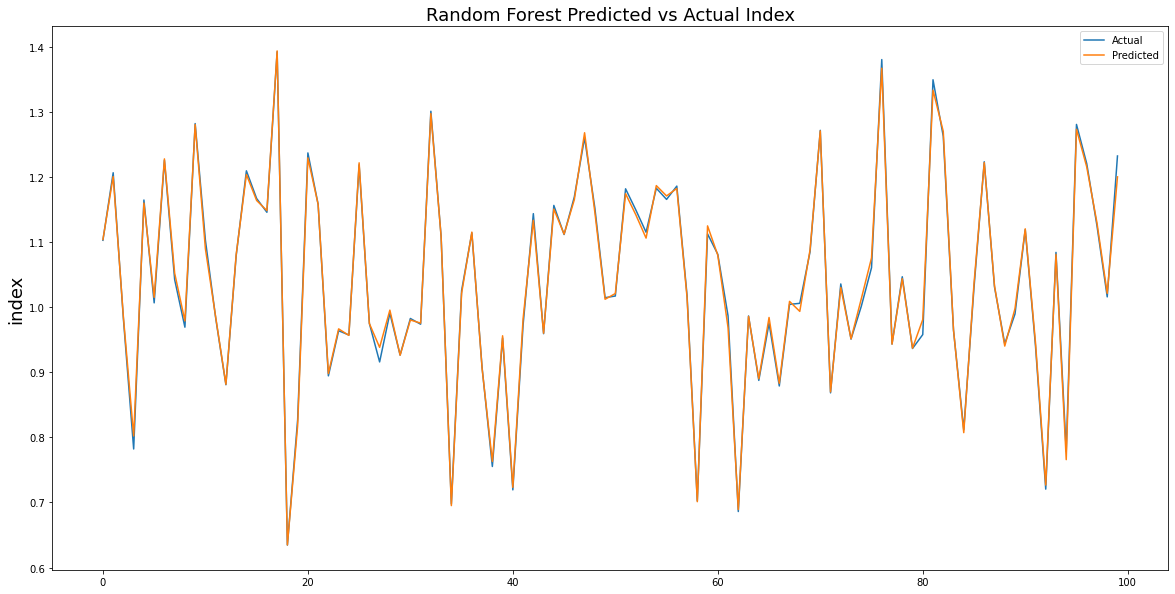

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize = (20,10))
pyplot.plot(y_test[:100], label='Actual')
pyplot.plot(predictions[:100], label='Predicted')
pyplot.ylabel('index', fontsize= 18)
pyplot.title('Random Forest Predicted vs Actual Index', fontsize= 18)
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

MSE = []
MAE = []
R2 = []


def display_MSE(scores):
    print("MSE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_MAE(scores):
    print("MAE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_R2(scores):
    print("R2: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))


for train_index, test_index in kfold.split(X):   
    X_train, x_test = Set[train_index], Set[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    rf_model = RandomForestRegressor(n_estimators = 90, max_features = 'sqrt', min_samples_leaf=1, min_samples_split = 2,random_state = 42, oob_score = True)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(x_test)
    
    MSE.append(mean_squared_error(y_test, y_pred))
    R2.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))

display_MSE(np.sqrt(MSE))
display_R2(R2)
display_MAE(MAE)


MSE: [0.00963475 0.00975713 0.00961067 0.00972527 0.00971587]
Mean: 0.009689
Std: 0.000056
R2: [0.9966353107735649, 0.9964897286396389, 0.9965692584295598, 0.9964858891676149, 0.9965191995284747]
Mean: 0.996540
Std: 0.000056
MAE: [0.006304445951300628, 0.006302172154142259, 0.006293832969054185, 0.006354961956955773, 0.006405522825600546]
Mean: 0.006332
Std: 0.000043


In [ ]:
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(rf,Set, labels, cv=5 )

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [ ]:
from sklearn.model_selection import KFold #5m 20s

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

MSE = []
R2 = []
MAE = []

def display_MSE(scores):
    print("MSE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_R2(scores):
    print("R2: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_MAE(scores):
    print("MAE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

for train_index, test_index in kfold.split(X):   
    X_train, x_test = Set[train_index], Set[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    rf_model = RandomForestRegressor(n_estimators = 90, max_features = 'auto', max_depth = 10, random_state = 42, oob_score = True)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(x_test)
    
    MSE.append(mean_squared_error(y_test, y_pred))
    R2.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))

    
display_MSE(np.sqrt(MSE))
display_R2(R2)
display_MAE(MAE)



MSE: [0.02404831 0.02346056 0.02353282 0.02379431 0.02376003 0.02357987
 0.023797   0.02352094 0.02315371 0.02403481]
Mean: 0.023668
Std: 0.000260
R2: [0.9790902368699899, 0.9799905452681281, 0.9793142226093557, 0.9793895621649115, 0.9790863696499208, 0.979284353968646, 0.9790511821626549, 0.9793488173439014, 0.9803620861020336, 0.9785551681888648]
Mean: 0.979347
Std: 0.000480
MAE: [0.017944425378030354, 0.017752224808186664, 0.0178190373446884, 0.018047179084357007, 0.018057833944370123, 0.01795552490122048, 0.017910044477185614, 0.017850191216743222, 0.017659423694314773, 0.01812020045521006]
Mean: 0.017912
Std: 0.000137


In [ ]:
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(rf,Set, labels, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.02


#Pickle

https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models
https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [ ]:
import joblib

In [ ]:
path = '/content/drive/MyDrive/VRA/dataset_csv/'
filename = open(path + "rf_model.sav", 'wb')
joblib.dump(rf, filename)
filename.close()

In [ ]:
#load model
path = '/content/drive/MyDrive/VRA/dataset_csv/'
filename = open(path + "rf_model.sav", 'rb')
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

#XGBOOST

GRID SEARCH CV
https://www.researchgate.net/publication/337048557_A_Comparative_Analysis_of_XGBoost

In [ ]:
import numpy as np 

#assign variable label
labels = np.array(dfLabel['index'])

#remove labels from the features
X = dfLabel
X = X.drop(['date','hour','day','state', 'pop_time', 'holiday', 'dt','signage_id','temp','index','feels_like','pop'], axis=1)

#save feature names
feature_list = list(dfLabel.columns)

#convert to numpy array
Set = np.array(X)

In [ ]:
X

,pop_time_label,holiday_label,temp_label,feels_like_label,pop_label,weather_main_label,weather_id_label,nearby_avg_rating,median_income_label,population_density_label
0,0.500,0.5,0.907106,1.162966,1.40,1.25,0.5,1.280120,1.1,1.035714
1,0.500,0.5,0.890007,1.027870,1.25,1.25,0.5,1.280120,1.1,1.035714
2,0.500,0.5,0.869998,0.743269,1.10,1.25,0.5,1.280120,1.1,1.035714
3,0.500,0.5,0.848533,0.754369,1.10,0.50,0.8,1.280120,1.1,1.035714
4,0.500,0.5,0.825976,0.738309,0.95,1.25,0.5,1.280120,1.1,1.035714
...,...,...,...,...,...,...,...,...,...,...
80635,1.055,2.0,0.901649,1.006141,0.65,0.50,0.8,1.945958,1.6,1.142857
80636,0.500,2.0,0.879457,0.749410,0.80,0.50,0.8,1.945958,1.6,1.142857
80637,0.500,2.0,0.864540,0.739726,1.55,1.25,0.5,1.945958,1.6,1.142857
80638,0.500,2.0,0.860538,0.737128,1.70,1.25,0.5,1.945958,1.6,1.142857


In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test , y_train, y_test = train_test_split(Set, labels , test_size = 0.20, random_state = 42)

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()

https://sci-hub.se/10.1109/ICAIT.2019.8935894 --> max_depth

In [ ]:
parameters = {
              'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07, 0.1], 
              'max_depth': [ 6, 7, 8],
              'min_child_weight': [1,3,5,7],
              'gamma' : [0.0,0.2,0.3,0.9],
              'silent': [1],
              'subsample': [0.75, 0.8],
              'colsample_bytree': [0.5,0.7],
              'n_estimators': [200,400,600,800]}


In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_grid = GridSearchCV(xgb1,parameters,cv=2 ,verbose=True, n_jobs= -1)
xgb_grid.fit(X_train,y_train)

In [ ]:
xgb_grid.best_params_

In [ ]:
xgb_grid.best_score_

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree= 0.7,
 learning_rate= 0.07,
 gamma = 0.2,
 max_depth = 5,
 min_child_weight= 3,
 n_estimators= 800,
 nthread= 4,
 silent= 1,
 subsample= 0.8)
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=800,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.8, verbosity=1)

In [ ]:
#50,50
predictions = xg_reg.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

MAE :  0.010634759612253335
R2 :  0.992477511567799
MSE :  0.00020524792036358453
RMSE :  0.014326476201899214


In [ ]:
#50,50
def xgb_feat_importance(xgb, df):
    return pd.DataFrame({'cols':df.columns, 'imp':xgb.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = xgb_feat_importance(xg_reg, X)
feat_imp

,cols,imp
5,weather_main_label,0.368103
8,median_income_label,0.203810
6,weather_id_label,0.119875
9,population_density_label,0.094383
2,temp_label,0.046712
4,pop_label,0.045174
0,pop_time_label,0.042889
1,holiday_label,0.037332
3,feels_like_label,0.023071
7,nearby_avg_rating,0.018652


In [ ]:
#60,40
predictions = xg_reg.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)


MAE :  0.010205787892690037
R2 :  0.9930654090429548
MSE :  0.00018969808998226773
RMSE :  0.013773092970798815


In [ ]:
#60,40
def xgb_feat_importance(xgb, df):
    return pd.DataFrame({'cols':df.columns, 'imp':xgb.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = xgb_feat_importance(xg_reg, X)
feat_imp

,cols,imp
5,weather_main_label,0.403820
8,median_income_label,0.182965
9,population_density_label,0.107580
6,weather_id_label,0.099309
1,holiday_label,0.046564
0,pop_time_label,0.046124
4,pop_label,0.045812
2,temp_label,0.037238
7,nearby_avg_rating,0.017130
3,feels_like_label,0.013459


In [ ]:
#70,30
predictions = xg_reg.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)


MAE :  0.00976719971799389
R2 :  0.9936733290421574
MSE :  0.0001728247771809665
RMSE :  0.01314628377835221


FEATURE IMPORTANCE

In [ ]:
#70,30
def xgb_feat_importance(xgb, df):
    return pd.DataFrame({'cols':df.columns, 'imp':xgb.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = xgb_feat_importance(xg_reg, X)
feat_imp

,cols,imp
5,weather_main_label,0.390763
8,median_income_label,0.184644
9,population_density_label,0.122021
6,weather_id_label,0.092713
0,pop_time_label,0.048785
1,holiday_label,0.046151
2,temp_label,0.044816
4,pop_label,0.041898
7,nearby_avg_rating,0.016033
3,feels_like_label,0.012176


In [ ]:
#80,20 #27s
predictions = xg_reg.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)


MAE :  0.009446405152155054
R2 :  0.9941229964788362
MSE :  0.0001621405204658443
RMSE :  0.01273344103005328


In [ ]:
#80,20
def xgb_feat_importance(xgb, df):
    return pd.DataFrame({'cols':df.columns, 'imp':xgb.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = xgb_feat_importance(xg_reg, X)
feat_imp

,cols,imp
5,weather_main_label,0.286597
8,median_income_label,0.254409
6,weather_id_label,0.164507
9,population_density_label,0.080138
1,holiday_label,0.047302
0,pop_time_label,0.047277
2,temp_label,0.045578
4,pop_label,0.040818
7,nearby_avg_rating,0.021455
3,feels_like_label,0.011918


In [ ]:
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(rf,Set, labels, cv=5 )

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

MSE = []
R2 = []
MAE = []

def display_MSE(scores):
    print("MSE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_R2(scores):
    print("R2: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_MAE(scores):
    print("MAE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

for train_index, test_index in kfold.split(X):   
    X_train, x_test = Set[train_index], Set[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    xgb_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree= 0.7,learning_rate= 0.07, gamma = 0.2, max_depth = 5, min_child_weight= 3, n_estimators= 800, nthread= 4, silent= 1, subsample= 0.8)
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(x_test)
    
    MSE.append(mean_squared_error(y_test, y_pred))
    R2.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))

    
display_MSE(np.sqrt(MSE))
display_R2(R2)
display_MAE(MAE)

MSE: [0.01277516 0.01317358 0.01276991 0.01294583 0.01273414]
Mean: 0.012880
Std: 0.000164
R2: [0.9940844203086978, 0.9936011238405856, 0.993943011402312, 0.9937731001529969, 0.9940206350101619]
Mean: 0.993884
Std: 0.000176
MAE: [0.009500771118643793, 0.009812180315394452, 0.00962581186555873, 0.009585853250384224, 0.009534043738300677]
Mean: 0.009612
Std: 0.000109


In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

MSE = []
R2 = []
MAE = []

def display_MSE(scores):
    print("MSE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_R2(scores):
    print("R2: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

def display_MAE(scores):
    print("MAE: {0}\nMean: {1:.6f}\nStd: {2:.6f}".format(scores, np.mean(scores), np.std(scores)))

for train_index, test_index in kfold.split(X):   
    X_train, x_test = Set[train_index], Set[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    xgb_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree= 0.7,learning_rate= 0.07, gamma = 0.2, max_depth = 5, min_child_weight= 3, n_estimators= 800, nthread= 4, silent= 1, subsample= 0.8)
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(x_test)
    
    MSE.append(mean_squared_error(y_test, y_pred))
    R2.append(r2_score(y_test,y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))

    
display_MSE(np.sqrt(MSE))
display_R2(R2)
display_MAE(MAE)

MSE: [0.0123775  0.01235271 0.01222592 0.01270318 0.01238516 0.01252843
 0.01275734 0.01223371 0.01203376 0.01233083]
Mean: 0.012393
Std: 0.000209
R2: [0.9944608164162111, 0.9944526876443152, 0.9944167472018014, 0.9941255708135112, 0.9943175069241854, 0.9941519779766999, 0.99397946675681, 0.9944133440683217, 0.9946953528088303, 0.9943554962122018]
Mean: 0.994337
Std: 0.000194
MAE: [0.00921541515365757, 0.009208611155805119, 0.009070000836633802, 0.009381516287018842, 0.009289533051234927, 0.009233606881135214, 0.009341830007901696, 0.009155935905070278, 0.008937022835380925, 0.009164641732236559]
Mean: 0.009200
Std: 0.000123


In [ ]:
from sklearn.model_selection import cross_val_predict

scores = cross_val_score(rf,Set, labels, cv=10 )

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.02


In [ ]:
#90,10
predictions = xg_reg.predict(x_test)

#MAE --> difference between predicted values and the actual
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE : ', mae)

#r squared --> 0-1, how related the prediction
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print('R2 : ', r2)

#MSE --> average of squared differences 
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print ("MSE : ", MSE)

#RMSE
import math
RMSE = math.sqrt(MSE)
print("RMSE : ", RMSE)

# MAE :  0.020831850293083563
# R2 :  0.9538512530739062
# MSE :  0.000790588401660587
# RMSE :  0.028117403892617594

MAE :  0.009100276642193416
R2 :  0.9945887653115413
MSE :  0.00014966366858005877
RMSE :  0.012233710335791785


In [ ]:
#90,10 #32s
def xgb_feat_importance(xgb, df):
    return pd.DataFrame({'cols':df.columns, 'imp':xgb.feature_importances_}
                       ).sort_values('imp', ascending=False)
feat_imp = xgb_feat_importance(xg_reg, X)
feat_imp

,cols,imp
5,weather_main_label,0.404028
8,median_income_label,0.265254
6,weather_id_label,0.081913
4,pop_label,0.051803
0,pop_time_label,0.050548
1,holiday_label,0.046816
2,temp_label,0.040925
9,population_density_label,0.028191
7,nearby_avg_rating,0.017671
3,feels_like_label,0.012851


In [ ]:
y_test.shape

(8064,)

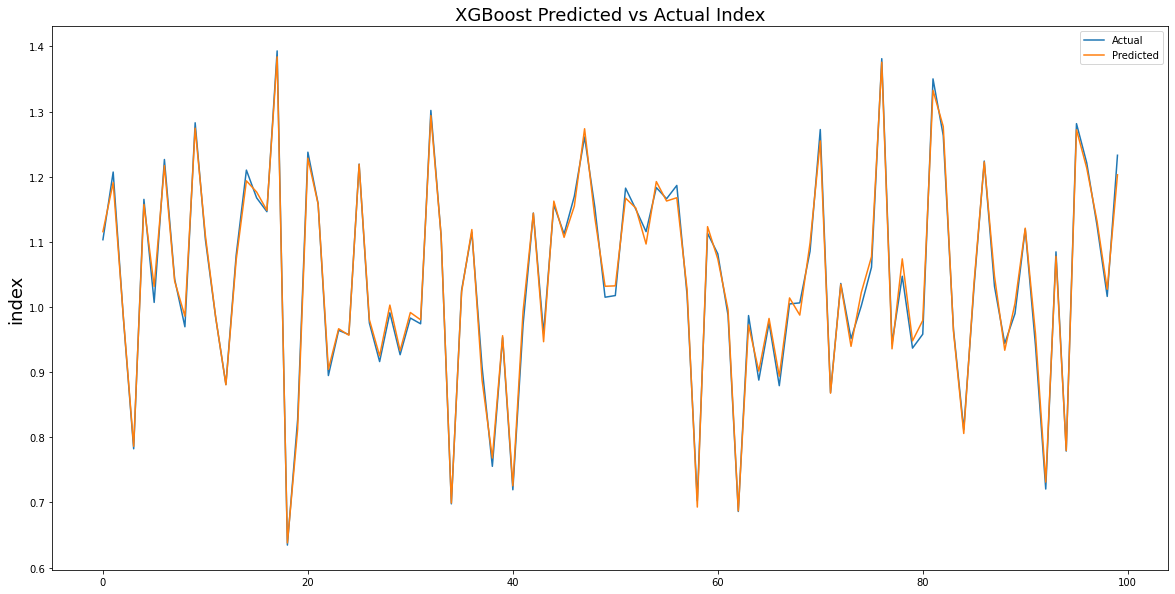

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize = (20,10))
pyplot.plot(y_test[:100], label='Actual')
pyplot.plot(predictions[:100], label='Predicted')
pyplot.ylabel('index', fontsize= 18)
pyplot.title('XGBoost Predicted vs Actual Index', fontsize= 18)
pyplot.legend()
pyplot.show()

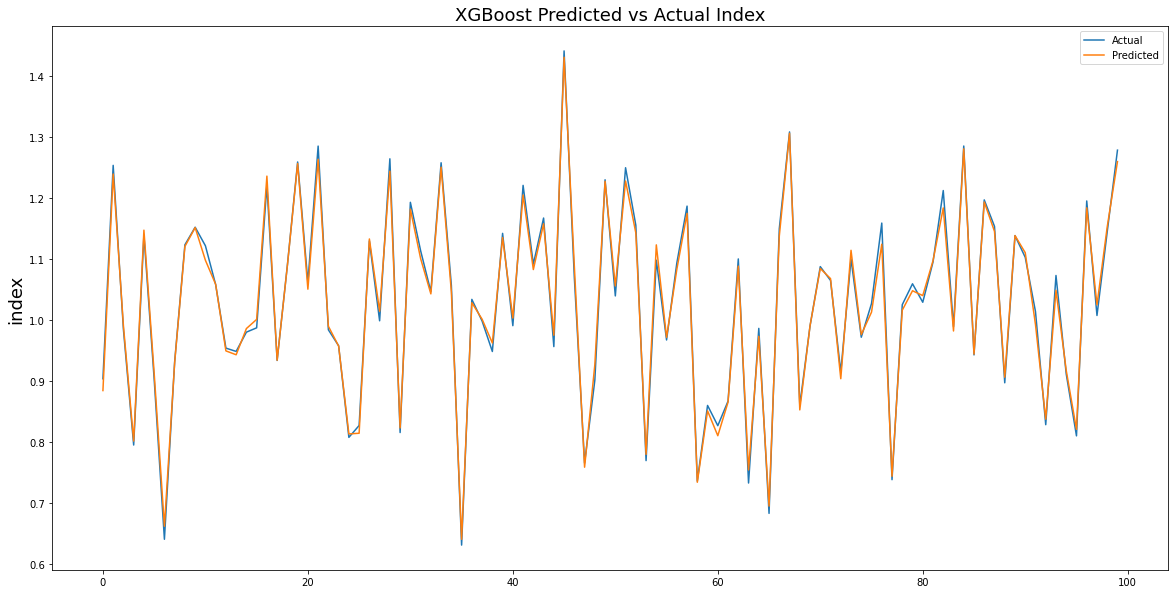

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize = (20,10))
pyplot.plot(y_test[7964:], label='Actual')
pyplot.plot(predictions[7964:], label='Predicted')
pyplot.ylabel('index', fontsize= 18)
pyplot.title('XGBoost Predicted vs Actual Index', fontsize= 18)
pyplot.legend()
pyplot.show()

#Pickle

In [ ]:
import joblib
path = '/content/drive/MyDrive/VRA/dataset_csv/'
filename = open(path + "xgb_model.sav", 'wb')
joblib.dump(xg_reg, filename)
filename.close()

In [ ]:
#load model
path = '/content/drive/MyDrive/VRA/dataset_csv/'
filename = open(path + "xgb_model.sav", 'rb')
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.9941229964788362
